**Import Libraries**

In [ ]:
!pip install neattext
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

**Import dataset**

In [ ]:
df = pd.read_csv("/content/emotion_dataset_raw.csv")

**EDA**

In [ ]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [ ]:
# Value Counts
df['Emotion'].value_counts()


,count
Emotion,
joy,11045
sadness,6722
fear,5410
anger,4297
surprise,4062
neutral,2254
disgust,856
shame,146


<Axes: xlabel='Emotion', ylabel='count'>

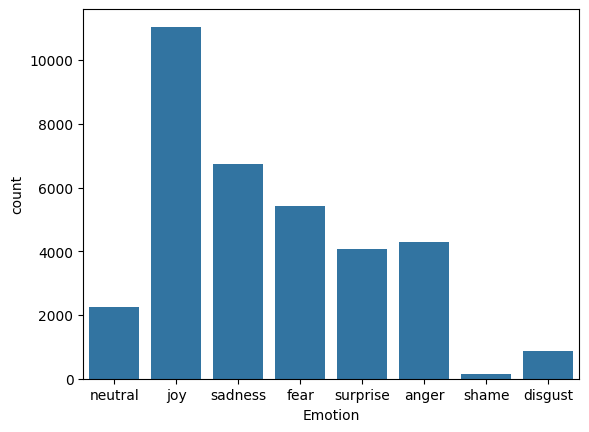

In [ ]:
# Plot
sns.countplot(x='Emotion',data=df)

In [ ]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [ ]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

**Model Building**

In [ ]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [ ]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
# Check Accuracy
pipe_lr.score(x_test,y_test)


0.6201379574631155

In [ ]:
# Assuming you have already split your data into x_train, x_test, y_train, y_test
# And your pipeline is stored in the variable 'pipe_lr'

# Make predictions on the testing data
y_pred = pipe_lr.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
print("F1 Score:", f1)

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Accuracy: 0.6201379574631155
Precision: 0.6214610009778814
Recall: 0.6201379574631155
F1 Score: 0.6133770298369438

Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.55      0.59      1283
     disgust       0.62      0.18      0.28       292
        fear       0.74      0.65      0.69      1645
         joy       0.62      0.75      0.67      3311
     neutral       0.59      0.73      0.65       675
     sadness       0.58      0.57      0.57      2015
       shame       0.82      0.78      0.80        36
    surprise       0.55      0.43      0.48      1181

    accuracy                           0.62     10438
   macro avg       0.64      0.58      0.59     10438
weighted avg       0.62      0.62      0.61     10438



In [ ]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [ ]:
pipe_lr.predict([ex1])


array(['joy'], dtype=object)

In [ ]:
pipe_lr.predict_proba([ex1])

array([[1.60976904e-03, 7.07982075e-03, 6.94650556e-03, 9.43876264e-01,
        1.00449749e-04, 2.62473633e-02, 6.57400222e-05, 1.40740880e-02]])

In [ ]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [ ]:
# Save Model & Pipeline
import joblib
pipeline_file = open("/content/emotion_classifier_pipe_lr.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
# Make A Prediction
ex2 = "I really hate that men "
pipe_lr.predict([ex2])

array(['anger'], dtype=object)

In [ ]:
# Save Model & Pipeline
import joblib
import os

# Create the 'models' directory if it doesn't exist
if not os.path.exists("../models"):
    os.makedirs("../models")

pipeline_file = open("../models/emotion_classifier_pipe_lr.pkl", "wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()

# --- Gradio GUI Integration ---
!pip install gradio
import gradio as gr

# Load the saved model
model_path = "../models/emotion_classifier_pipe_lr.pkl"
loaded_model = joblib.load(model_path)

def predict_emotion(text):
    """Predicts the emotion of the input text using the loaded model."""
    prediction = loaded_model.predict([text])[0]  # Get the predicted emotion
    probabilities = loaded_model.predict_proba([text])[0] # Get probabilities for each class

    # Format the probabilities with class names for display
    class_probabilities = dict(zip(loaded_model.classes_, probabilities))

    # Return the predicted emotion and probabilities
    return prediction, class_probabilities

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Textbox(lines=2, placeholder="Enter text here..."),
    outputs=[gr.Textbox(label="Predicted Emotion"), gr.Label(label="Probabilities")],
    title="Emotion Classifier",
    description="Enter text to classify its emotion."
)

# Launch the interface
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4e0340bf39e86404bb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
